In [53]:
import numpy as np
import pandas as pd 
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification

In [54]:
X , y = make_classification(n_samples=100 , n_classes=2 , n_features=2 , n_informative=1 ,hypercube=False,
                            n_clusters_per_class=1 , class_sep=40 , random_state=41 ,n_redundant=0)

In [55]:
X.shape , y.shape

((100, 2), (100,))

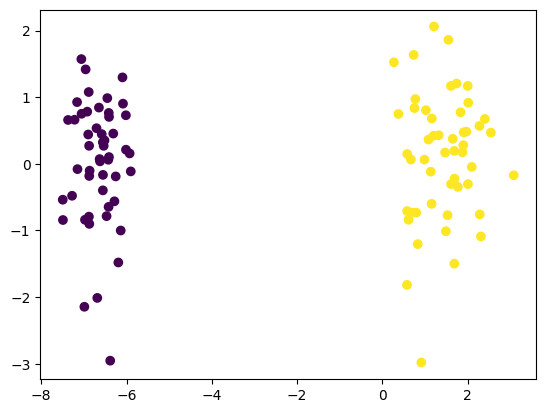

In [56]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0] , X[:,1] , c = y)
plt.show()

In [57]:
lor = LogisticRegression(penalty=None ) # by default this class use L2 Regularizarion
lor.fit(X,y)

,penalty,None
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [58]:
coef , intercept = lor.coef_ , lor.intercept_

In [59]:
coef , intercept

(array([[4.49896712, 0.20132876]]), array([5.28343857]))

In [60]:
m1 = -coef[0][0]/coef[0][1]
c1 = -intercept/coef[0][1]

In [61]:
x_t = np.linspace(-3,3,100)
y_t = m1*x_t+c1

In [62]:
# grad = (-1/m)(Y - Y_hat)X , X = [[ 1 , x11 ,x12] , [1,x21 , x22] , ...], size =m*(n+1)
# Y = [y1 , y2 , y3 , ....] column vector
# Y_hat = sigmoid(XW)
# W = [ w0 , w1 , w2] column vector 

In [85]:

def sigmoid(z):
    return 1/(1+np.exp(-z))

def GD(X,y):
    X = np.insert(X , 0 ,1 , axis=1)
    W = np.ones(X.shape[1])
    lr= 0.5
    for i in range(3000):
        y_hat = sigmoid(np.dot(X,W))
        W = W+lr*((np.dot((y-y_hat) ,X))/(X.shape[0]))
        
    return W[0] , W[1:]
        

In [86]:
intercept2 , coef2   = GD(X ,y)

In [87]:
intercept2 , coef2

(np.float64(3.8542900976319374), array([3.36245382, 0.13513718]))

In [88]:
m2 = -(coef2[0]/coef2[1])
c2 = -(intercept2/coef2[1])

In [89]:
y_t2 = m2*x_t +c2

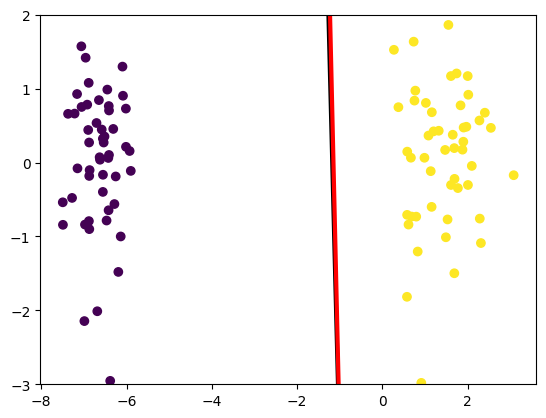

In [90]:
plt.scatter(X[:,0] , X[:,1]  , c=y)
plt.plot(x_t , y_t ,  c= 'black' ,linewidth=3 , label = 'LogisticRegression class')
plt.plot(x_t ,y_t2 , c='red' , linewidth=3 ,label="Gradient Descent")
plt.ylim(-3,2)
plt.show()

In [ ]:
# now both are the same line 